In [92]:
import matplotlib.pyplot as plt
import PIL.Image


path_to_traj = "data/CenterLineImages_w/approaching (3)_w_centerline.png"
path_to_truth = "data/LabelsAutomatedStep1/approaching (3)_g_add_filtered.png"
path_to_prediction = "data/predict_line/height_32/batch_56_channels/6400/train/approaching (3)_m.png"
#get image data, view image with PIL
truth = PIL.Image.open(path_to_truth)
pred = PIL.Image.open(path_to_prediction)
traj = PIL.Image.open(path_to_traj)

green_red=False


In [107]:
# motion_classes = {
#     "next_into_driving_cut":(255, 140, 0),
#     "next_into_driving_safe":(255, 165, 0),
#     "driving_lane_approaching_front":(255, 0, 0),
#     "driving_lane_leaving_front":(240, 128, 128),
#     "driving_lane_stable":(255, 99, 71),
#     "next_static_parallel":(255, 255, 0),
#     "next_static_passing":(255, 215, 0),
#     "next_static_passed":(218, 165, 32),
#     "ramp_merging":(60, 179, 113),
#     "opposite_vehicle":(128, 0, 128),
#     "crossing_vehicle":(0, 0, 255),
#     "turning_away":(0, 255, 255),
#     "parked_vehicles_same_side":(218, 165, 32),
#     "parked_vehicles_opposite_side":(128, 0, 128)
# }
motion_classes = {
    (255, 140, 0):"next_into_driving_cut",
    (255, 165, 0):"next_into_driving_safe",
    (255, 0, 0):"driving_lane_approaching_front",
    (240, 128, 128):"driving_lane_leaving_front",
    (255, 99, 71):"driving_lane_stable",
    (255, 255, 0):"next_static_parallel",
    (255, 215, 0):"next_static_passing",
    (218, 165, 32):"next_static_passed",
    (60, 179, 113):"ramp_merging",
    (128, 0, 128):"opposite_vehicle",
    (0, 0, 255):"crossing_vehicle",
    (0, 255, 255):"turning_away"
}

In [113]:
#find truth values that are green
coords = []
if not green_red:
    for i in range(traj.size[0]):
        for j in range(traj.size[1]):
            if traj.getpixel((i,j)) == (0, 255, 0):
                coords.append((i,j))
else:
    # green and red pixels
    for i in range(traj.size[0]):
        for j in range(traj.size[1]):
            if traj.getpixel((i,j)) == (0, 255, 0) or traj.getpixel((i,j)) == (255, 0, 0):
                coords.append((i,j))

#normalize all coords to the dimensions of the smaller image
scale = (pred.size[0]/traj.size[0], pred.size[1]/traj.size[1])
coords = [(int(scale[0]*x), int(scale[1]*y)) for x,y in coords]

#map the coords to the pred image, remove duplicates

# for x,y in coords:
#     # if the current pixel is not black, color it red
#     if pred.getpixel((x,y)) != (0,0,0):
#         pred.putpixel((x,y), (255,0,0))
coords = set(coords)
# coords.remove((0,0,0))
coords = list(coords)

In [95]:
print(pred.size)
print(truth.size)

(256, 1769)
(256, 1800)


In [96]:
print(pred.getpixel(coords[0]))
print(truth.getpixel(coords[0]))

(255, 255, 0)
(255, 255, 0)


In [118]:
list_of_motion_classes = list(motion_classes.values())
matrix = []
for c1 in range(len(list_of_motion_classes)):
    matrix.append([])
    for c2 in list_of_motion_classes:
        matrix[c1].append(0)
matrix

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [119]:
for coord in coords:
    t1 = truth.getpixel(coord)
    t2 = pred.getpixel(coord)
    if t1 in motion_classes and t2 in motion_classes:
        c1 = motion_classes[truth.getpixel(coord)]
        c2 = motion_classes[pred.getpixel(coord)]
        keyloc1 = list_of_motion_classes.index(c1)
        keyloc2 = list_of_motion_classes.index(c2)
        matrix[keyloc1][keyloc2] += 1
    else:
        print("Error for coord " + str(coord))
matrix

Error for coord (244, 1268)
Error for coord (17, 1491)
Error for coord (203, 76)
Error for coord (240, 1275)
Error for coord (122, 910)
Error for coord (206, 86)
Error for coord (9, 1477)
Error for coord (113, 811)
Error for coord (248, 1493)
Error for coord (6, 1471)
Error for coord (121, 900)
Error for coord (192, 57)
Error for coord (183, 1634)
Error for coord (243, 1270)
Error for coord (164, 79)
Error for coord (235, 139)
Error for coord (245, 1501)
Error for coord (239, 1277)
Error for coord (228, 1533)
Error for coord (187, 40)
Error for coord (203, 1597)
Error for coord (223, 119)
Error for coord (180, 14)
Error for coord (201, 73)
Error for coord (182, 1636)
Error for coord (216, 1549)
Error for coord (112, 795)
Error for coord (131, 1711)
Error for coord (227, 1535)
Error for coord (154, 10)
Error for coord (215, 105)
Error for coord (187, 43)
Error for coord (198, 1593)
Error for coord (228, 1621)
Error for coord (8, 1474)
Error for coord (190, 53)
Error for coord (232, 1627

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 17, 7, 616, 67, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 621, 24, 35, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 13, 1008, 19, 0, 4, 0, 0],
 [0, 0, 0, 0, 0, 0, 26, 498, 0, 18, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

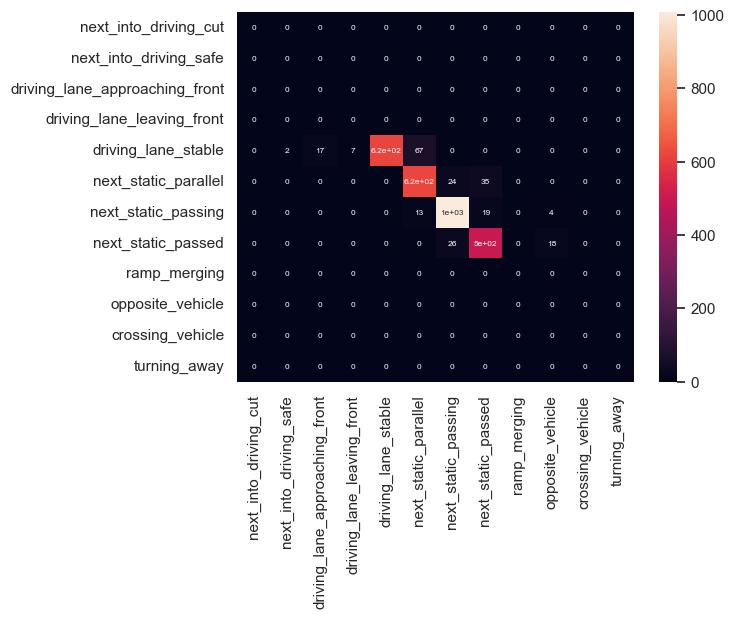

In [133]:
# convert to np array
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(matrix, list_of_motion_classes, list_of_motion_classes)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 6}) # font size

plt.show()
